In [41]:
import os
os.environ["OMP_NUM_THREADS"] = "8"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [42]:
df = pd.read_excel(r"C:\\Users\\ancha\\OneDrive\\Desktop\\Customers.csv.xlsx")

In [43]:
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())


Shape: (2000, 8)

Missing values:
 CustomerID          0
Gender              0
Age                 0
Annual Income       0
Spending Score      0
Profession         35
Work Experience     0
Family Size         0
dtype: int64

Duplicates: 0

Data Types:
 CustomerID          int64
Gender             object
Age                 int64
Annual Income       int64
Spending Score      int64
Profession         object
Work Experience     int64
Family Size         int64
dtype: object

Summary Statistics:
         CustomerID          Age  Annual Income  Spending Score  \
count  2000.000000  2000.000000    2000.000000     2000.000000   
mean   1000.500000    48.960000  110731.821500       50.962500   
std     577.494589    28.429747   45739.536688       27.934661   
min       1.000000     0.000000       0.000000        0.000000   
25%     500.750000    25.000000   74572.000000       28.000000   
50%    1000.500000    48.000000  110045.000000       50.000000   
75%    1500.250000    73.000000  149092.7

In [44]:
print(df.columns.tolist())


['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score', 'Profession', 'Work Experience', 'Family Size']


In [45]:
features = ["Age", "Annual Income", "Spending Score"]

In [46]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

In [47]:
scaled_df = pd.DataFrame(scaled_data, columns=features)

In [48]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

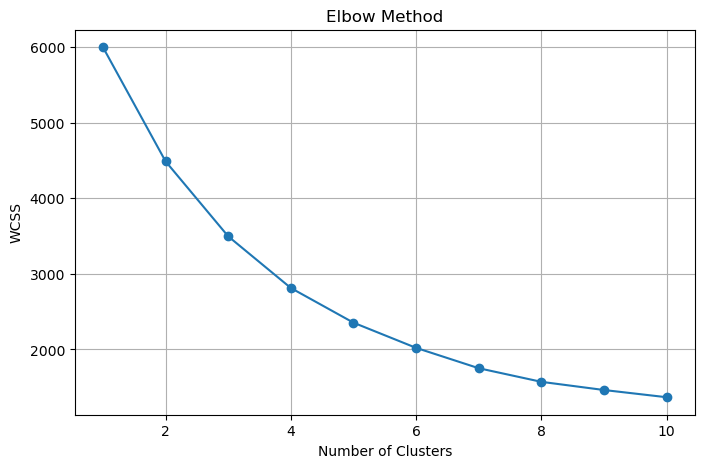

In [49]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [50]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    print(f"Silhouette Score for {k} clusters: {score:.4f}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Silhouette Score for 2 clusters: 0.2454
Silhouette Score for 3 clusters: 0.2531


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Silhouette Score for 4 clusters: 0.2649


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Silhouette Score for 5 clusters: 0.2714
Silhouette Score for 6 clusters: 0.2830


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Silhouette Score for 7 clusters: 0.2827


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Silhouette Score for 8 clusters: 0.2754


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Silhouette Score for 9 clusters: 0.2704
Silhouette Score for 10 clusters: 0.2798


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [51]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(scaled_df)

# Cluster centroids (in original scale)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=features)
print("\nCentroids:\n", centroid_df)


Centroids:
          Age  Annual Income  Spending Score
0  49.173077   72885.113462       25.311538
1  21.800443  153183.862528       50.059867
2  78.326923  138804.337413       52.819930
3  38.763676   76764.509847       78.715536


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


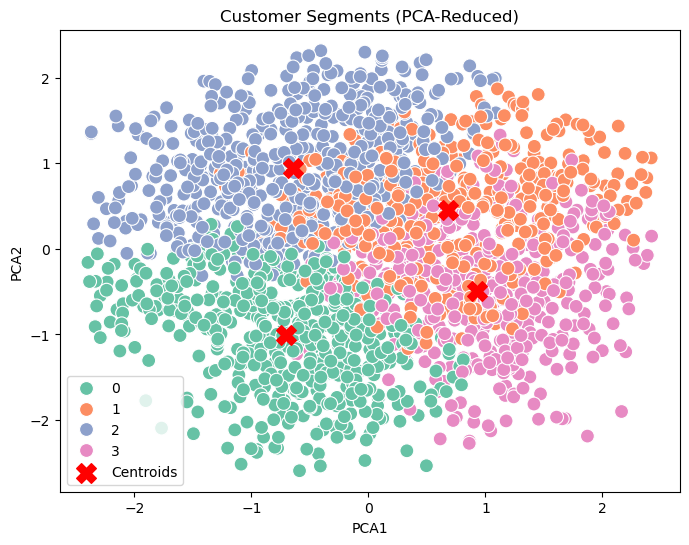

In [52]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

df["PCA1"] = pca_data[:, 0]
df["PCA2"] = pca_data[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="Set2", s=100)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0],
            pca.transform(kmeans.cluster_centers_)[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("Customer Segments (PCA-Reduced)")
plt.legend()
plt.show()

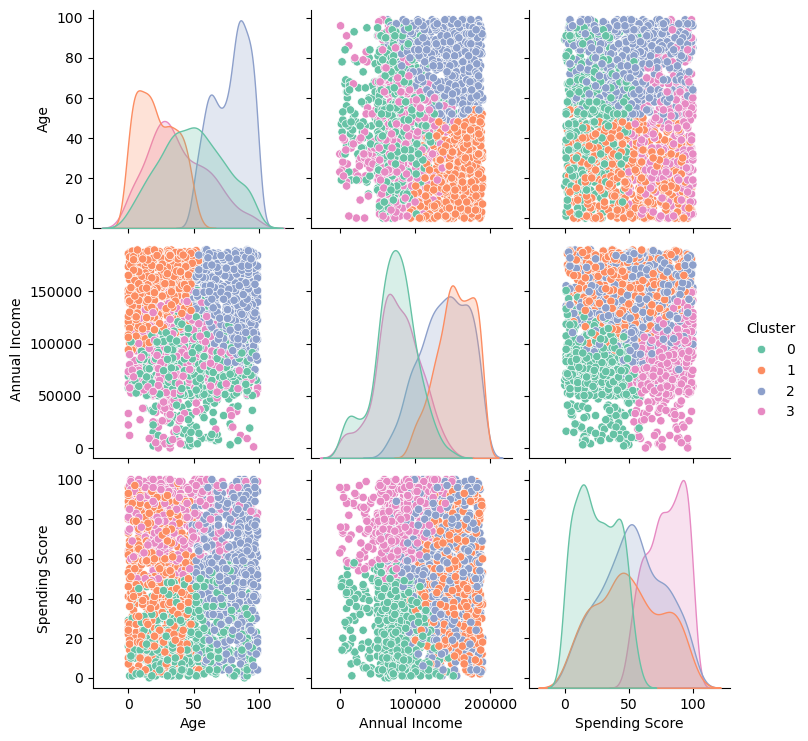

In [53]:
sns.pairplot(df[features + ["Cluster"]], hue="Cluster", palette="Set2")
plt.show()

In [54]:
cluster_summary = df.groupby("Cluster")[features].mean()
print("\nCluster Summary:\n", cluster_summary)

# Example recommendation generation
for cluster_id, row in cluster_summary.iterrows():
    if row["Spending Score"] > 70 and row["Annual Income"] > 60000:
        print(f"Cluster {cluster_id}: High spenders — target with premium loyalty programs.")
    elif row["Spending Score"] > 50:
        print(f"Cluster {cluster_id}: Medium spenders — upsell with discounts.")
    else:
        print(f"Cluster {cluster_id}: Low spenders — focus on awareness campaigns.")


Cluster Summary:
                Age  Annual Income  Spending Score
Cluster                                          
0        49.173077   72885.113462       25.311538
1        21.846667  153318.328889       50.040000
2        78.326923  138804.337413       52.819930
3        38.681223   76799.246725       78.672489
Cluster 0: Low spenders — focus on awareness campaigns.
Cluster 1: Medium spenders — upsell with discounts.
Cluster 2: Medium spenders — upsell with discounts.
Cluster 3: High spenders — target with premium loyalty programs.
